In [43]:
from __future__ import print_function, division
from builtins import range
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


def forward(X, W1, b1, W2, b2):
    # sigmoid
    # Z = 1 / (1 + np.exp(-( X.dot(W1) + b1 )))

    # relu
    Z = X.dot(W1) + b1
    Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def derivative_w2(Z, T, Y):
    return Z.T.dot(Y - T)

def derivative_b2(T, Y):
    return (Y - T).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    # return X.T.dot( ( ( Y-T ).dot(W2.T) * ( Z*(1 - Z) ) ) ) # for sigmoid
    return X.T.dot( ( ( Y-T ).dot(W2.T) * (Z > 0) ) ) # for relu

def derivative_b1(Z, T, Y, W2):
    # return (( Y-T ).dot(W2.T) * ( Z*(1 - Z) )).sum(axis=0) # for sigmoid
    return (( Y-T ).dot(W2.T) * (Z > 0)).sum(axis=0) # for relu

In [44]:
def get_normalized_data():
    print("Reading in and transforming data...")

    if not os.path.exists('Mnist/train.csv'):
        print('Looking for Mnist/train.csv')
        print('You have not downloaded the data and/or not placed the files in the correct location.')
        print('Please get the data from: https://www.kaggle.com/c/digit-recognizer')
        print('Place train.csv in the folder Mnist adjacent to the class folder')
        exit()

    df = pd.read_csv('Mnist/train.csv')
    data = df.values.astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = data[:, 0]

    Xtrain = X[:-1000]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:]
    Ytest  = Y[-1000:]

    # normalize the data
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    np.place(std, std == 0, 1)
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    return Xtrain, Xtest, Ytrain, Ytest

In [45]:
def predict(p_y):
    return np.argmax(p_y, axis=1)


def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()

def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [46]:
max_iter = 20
print_period = 10 
Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
lr = 0.00004
reg = 0.01

Reading in and transforming data...


In [47]:
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)
N, D =Xtrain.shape
batch_sz = 500
n_batches = N // batchSize
M = 300
K = 10
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

In [48]:
#Normal batch gradient descent
LL_batch = []
CR_batch = []
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        # print "first batch cost:", cost(pYbatch, Ybatch)

        # updates
        W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)

        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            # print "pY:", pY
            ll = cost(pY, Ytest_ind)
            LL_batch.append(ll)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

            err = error_rate(pY, Ytest)
            CR_batch.append(err)
            print("Error rate:", err)

pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))


Cost at iteration i=0, j=0: 2375.429361
Error rate: 0.905
Cost at iteration i=0, j=10: 1800.700076
Error rate: 0.489
Cost at iteration i=0, j=20: 1434.820221
Error rate: 0.336
Cost at iteration i=0, j=30: 1194.464536
Error rate: 0.261
Cost at iteration i=0, j=40: 1028.428403
Error rate: 0.225
Cost at iteration i=0, j=50: 911.383262
Error rate: 0.199
Cost at iteration i=0, j=60: 819.760170
Error rate: 0.181
Cost at iteration i=0, j=70: 752.020643
Error rate: 0.171
Cost at iteration i=0, j=80: 698.119117
Error rate: 0.151
Cost at iteration i=1, j=0: 688.819706
Error rate: 0.151
Cost at iteration i=1, j=10: 646.737947
Error rate: 0.148
Cost at iteration i=1, j=20: 612.721605
Error rate: 0.146
Cost at iteration i=1, j=30: 583.169959
Error rate: 0.14
Cost at iteration i=1, j=40: 557.452908
Error rate: 0.135
Cost at iteration i=1, j=50: 536.552800
Error rate: 0.131
Cost at iteration i=1, j=60: 516.861619
Error rate: 0.13
Cost at iteration i=1, j=70: 500.770313
Error rate: 0.127
Cost at itera

Cost at iteration i=15, j=60: 241.953182
Error rate: 0.066
Cost at iteration i=15, j=70: 241.544425
Error rate: 0.066
Cost at iteration i=15, j=80: 240.531150
Error rate: 0.065
Cost at iteration i=16, j=0: 240.483668
Error rate: 0.065
Cost at iteration i=16, j=10: 239.619337
Error rate: 0.066
Cost at iteration i=16, j=20: 239.336665
Error rate: 0.066
Cost at iteration i=16, j=30: 238.984322
Error rate: 0.066
Cost at iteration i=16, j=40: 238.232129
Error rate: 0.064
Cost at iteration i=16, j=50: 238.441032
Error rate: 0.065
Cost at iteration i=16, j=60: 237.686051
Error rate: 0.065
Cost at iteration i=16, j=70: 237.318999
Error rate: 0.064
Cost at iteration i=16, j=80: 236.342982
Error rate: 0.065
Cost at iteration i=17, j=0: 236.298524
Error rate: 0.065
Cost at iteration i=17, j=10: 235.474778
Error rate: 0.064
Cost at iteration i=17, j=20: 235.222446
Error rate: 0.061
Cost at iteration i=17, j=30: 234.901692
Error rate: 0.064
Cost at iteration i=17, j=40: 234.184257
Error rate: 0.063

In [49]:
# RMSprop to speed up
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_rms = []
CR_rms = []
lr0 = 0.001 # if you set this too high you'll get NaN!
cache_W2 = 1
cache_b2 = 1
cache_W1 = 1
cache_b1 = 1
decay_rate = 0.999
eps = 1e-10
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        # print "first batch cost:", cost(pYbatch, Ybatch)

        # updates
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
        W2 -= lr0 * gW2 / (np.sqrt(cache_W2) + eps)

        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
        b2 -= lr0 * gb2 / (np.sqrt(cache_b2) + eps)

        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
        W1 -= lr0 * gW1 / (np.sqrt(cache_W1) + eps)

        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
        cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
        b1 -= lr0 * gb1 / (np.sqrt(cache_b1) + eps)

        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            # print "pY:", pY
            ll = cost(pY, Ytest_ind)
            LL_rms.append(ll)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

            err = error_rate(pY, Ytest)
            CR_rms.append(err)
            print("Error rate:", err)

pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

Cost at iteration i=0, j=0: 1357.372003
Error rate: 0.41
Cost at iteration i=0, j=10: 423.961010
Error rate: 0.125
Cost at iteration i=0, j=20: 344.415818
Error rate: 0.107
Cost at iteration i=0, j=30: 309.840124
Error rate: 0.091
Cost at iteration i=0, j=40: 273.569650
Error rate: 0.076
Cost at iteration i=0, j=50: 262.406624
Error rate: 0.073
Cost at iteration i=0, j=60: 252.421093
Error rate: 0.077
Cost at iteration i=0, j=70: 232.608795
Error rate: 0.068
Cost at iteration i=0, j=80: 216.703895
Error rate: 0.06
Cost at iteration i=1, j=0: 216.072669
Error rate: 0.059
Cost at iteration i=1, j=10: 209.647111
Error rate: 0.055
Cost at iteration i=1, j=20: 216.347709
Error rate: 0.06
Cost at iteration i=1, j=30: 212.824497
Error rate: 0.062
Cost at iteration i=1, j=40: 196.072366
Error rate: 0.048
Cost at iteration i=1, j=50: 193.169535
Error rate: 0.053
Cost at iteration i=1, j=60: 194.483051
Error rate: 0.05
Cost at iteration i=1, j=70: 191.021501
Error rate: 0.05
Cost at iteration i=

Cost at iteration i=15, j=60: 135.551069
Error rate: 0.033
Cost at iteration i=15, j=70: 139.524706
Error rate: 0.032
Cost at iteration i=15, j=80: 132.779334
Error rate: 0.032
Cost at iteration i=16, j=0: 133.347656
Error rate: 0.032
Cost at iteration i=16, j=10: 134.743811
Error rate: 0.034
Cost at iteration i=16, j=20: 136.676595
Error rate: 0.035
Cost at iteration i=16, j=30: 137.175691
Error rate: 0.033
Cost at iteration i=16, j=40: 133.746904
Error rate: 0.033
Cost at iteration i=16, j=50: 134.920025
Error rate: 0.032
Cost at iteration i=16, j=60: 136.478039
Error rate: 0.033
Cost at iteration i=16, j=70: 140.209019
Error rate: 0.032
Cost at iteration i=16, j=80: 133.920956
Error rate: 0.032
Cost at iteration i=17, j=0: 134.526685
Error rate: 0.032
Cost at iteration i=17, j=10: 135.445951
Error rate: 0.033
Cost at iteration i=17, j=20: 137.511484
Error rate: 0.035
Cost at iteration i=17, j=30: 138.013325
Error rate: 0.033
Cost at iteration i=17, j=40: 134.850045
Error rate: 0.032

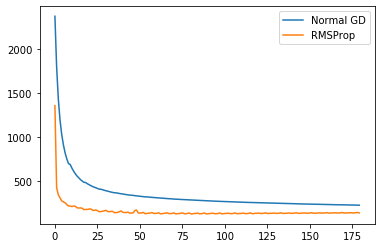

In [50]:
plt.plot(LL_batch, label='Normal GD')
plt.plot(LL_rms, label='RMSProp')
plt.legend()
plt.show()